Libraries Used in the Program

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2
import pathlib


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

Accesing the Dataset

In [23]:
dataset = pathlib.Path("DataSet/train")
dataset

WindowsPath('DataSet/train')

Finding the Total Images in the dataset of all three Classes

In [25]:
total_Images = len(list(data_dir.glob('*/*.jpg')))
print(total_Images)

391


Class 500 Notes

In [28]:
five_100 = list(data_dir.glob('500/*'))
five_100[:2]

[WindowsPath('DataSet/train/500/500-3.jpg'),
 WindowsPath('DataSet/train/500/500.jpg')]

Displaying on of the 500 note

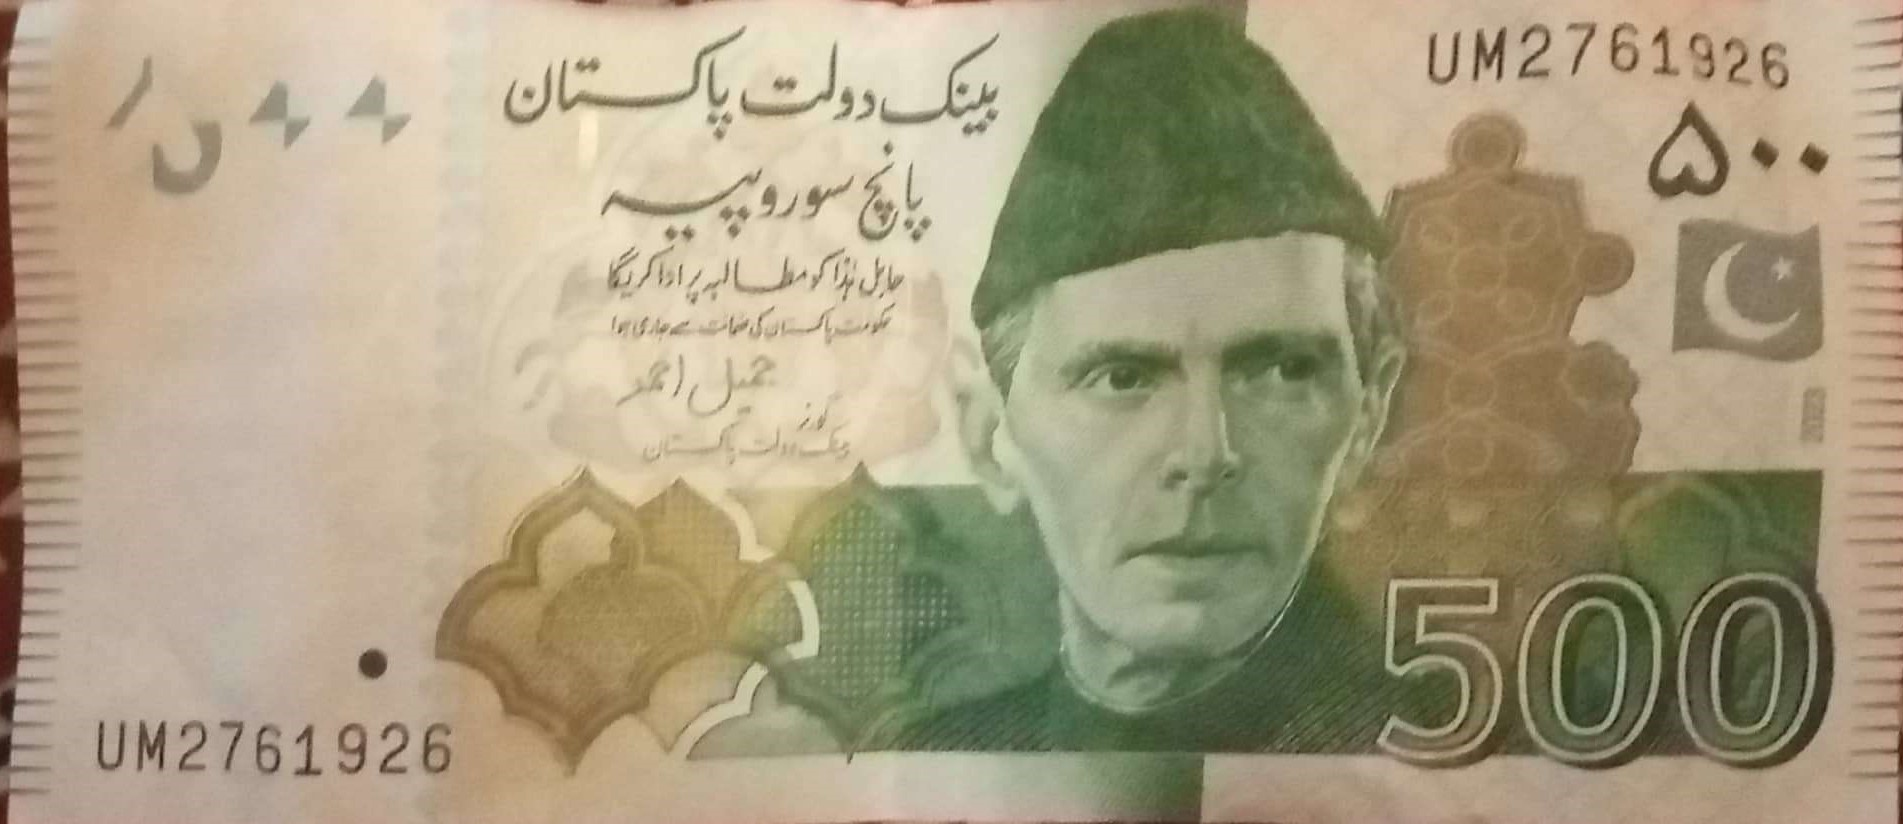

In [29]:
PIL.Image.open(str(five_hundred[20]))

Similarly, For 1000 RS Note

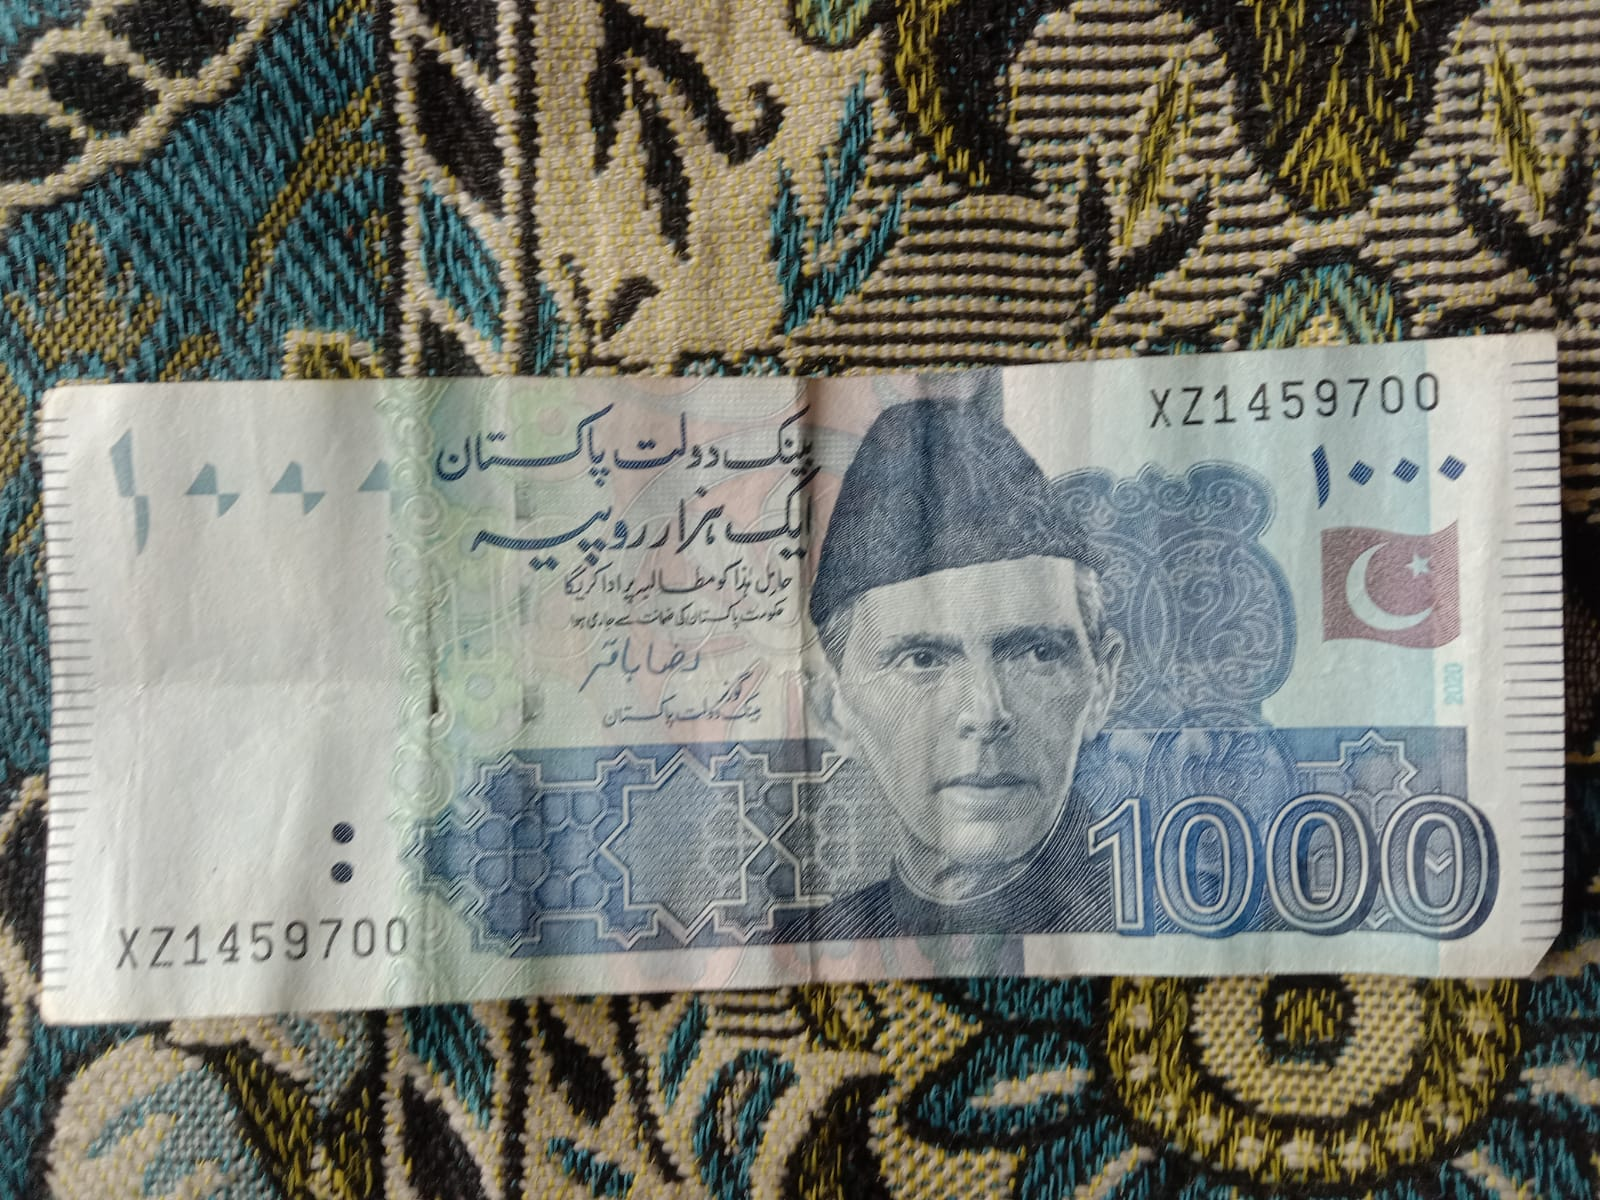

In [33]:
thousand = list(data_dir.glob('1000/*'))
PIL.Image.open(str(thousand[10]))

Creating a dictionary of List of all Classes Notes

In [35]:
currency_images_dict = {
    '500:Five_hundred': list(data_dir.glob('500/*')),
    '1000:Thousand': list(data_dir.glob('1000/*')),
    '5000:Five_thousand': list(data_dir.glob('5000/*')),
}

In [36]:
currency_labels_dict = {
    '500:Five_hundred': 0,
    '1000:Thousand': 1,
    '5000:Five_thousand': 2,
}

Finding the Shape of Note By reading through OpenCv

In [38]:
img = cv2.imread(str(currency_images_dict['500:Five_hundred'][0]))
img.shape

(702, 1607, 3)

In [39]:
X, y = [], []

# Appending the Resized Image into our Features Variable X.
# Appending there Corresponding Label in Target Variable Y.
for currency_name, images in currency_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(currency_labels_dict[currency_name])

For Model Training Converting X, Y in Arrays and Spliting into Test and Training data

In [40]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

range of Pixel value : gray level of each channel is Adjusting to 0-1 range

In [47]:
X_train = X_train / 255
X_test= X_test / 255

In [48]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

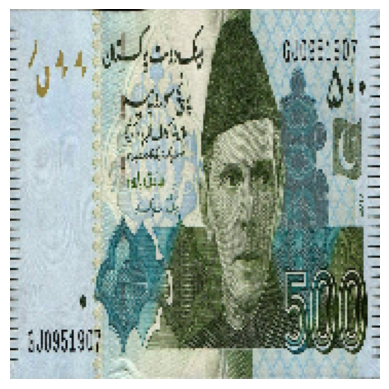

In [49]:
plt.axis('off')
plt.imshow(X[0])

After Performing the Augmentation on the Sample Note

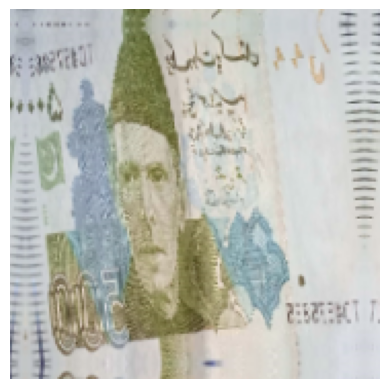

In [50]:
plt.axis('off')
plt.imshow(data_augmentation(X)[3].numpy().astype("uint8"))

In [52]:
classes = 3

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
10/10 [==============================] - 17s 1s/step - loss: 1.1050 - accuracy: 0.4524
Epoch 2/20
10/10 [==============================] - 10s 1s/step - loss: 0.4154 - accuracy: 0.9218
Epoch 3/20
10/10 [==============================] - 12s 1s/step - loss: 0.0371 - accuracy: 0.9966
Epoch 4/20
10/10 [==============================] - 8s 771ms/step - loss: 0.0310 - accuracy: 0.9898
Epoch 5/20
10/10 [==============================] - 8s 759ms/step - loss: 0.1146 - accuracy: 0.9694
Epoch 6/20
10/10 [==============================] - 8s 814ms/step - loss: 0.1726 - accuracy: 0.9456
Epoch 7/20
10/10 [==============================] - 11s 1s/step - loss: 0.0706 - accuracy: 0.9830
Epoch 8/20
10/10 [==============================] - 8s 809ms/step - loss: 0.0267 - accuracy: 0.9966
Epoch 9/20
10/10 [==============================] - 8s 765ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 10/20
10/10 [==============================] - 8s 761ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 1

Validating our Model on Testing DATA

In [53]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 1s 188ms/step - loss: 0.0075 - accuracy: 1.0000


[0.007487936411052942, 1.0]

Saving our Model Weights in H5 File

In [54]:
model.save("CurrenyNote_Model.h5")

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 22, 22, 64)       